In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# 🤖 Introducción a Redes Neuronales

Las **redes neuronales** son una técnica inspirada en cómo funciona el cerebro humano. En lugar de neuronas biológicas, usamos funciones matemáticas llamadas "neuronas artificiales", organizadas en capas, que aprenden patrones a partir de datos.

## 🧠 ¿Qué es una red neuronal?

Una red neuronal es un conjunto de **capas** conectadas entre sí:

- **Capa de entrada**: recibe los datos (por ejemplo, imágenes, texto, números).
- **Capas ocultas**: realizan operaciones matemáticas para detectar patrones.
- **Capa de salida**: da la predicción final (por ejemplo, una categoría o un número).

Cada "neurona" en estas capas realiza un cálculo simple, pero cuando se conectan muchas, logran aprender cosas muy complejas.

## 📦 Casos de uso en la vida real

Las redes neuronales están detrás de muchas aplicaciones que usamos a diario:

- **Reconocimiento de imágenes**: como cuando tu celular detecta caras.
- **Traducción automática**: como Google Translate.
- **Recomendaciones**: como las películas que te sugiere Netflix o las canciones en Spotify.
- **Detección de fraudes**: en bancos para identificar transacciones sospechosas.
- **Predicción de demanda o ventas**: útil en negocios para saber cuántos productos producir o vender.

> ✅ En resumen: las redes neuronales aprenden a resolver tareas complejas observando muchos ejemplos. Son como estudiantes muy aplicados que mejoran con la práctica (los datos).



![Python Logo](https://media.licdn.com/dms/image/v2/C4E12AQGlOgytG9a-3w/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1563201137028?e=2147483647&v=beta&t=wjVE2EZzUyFPfCaliG95w5QI0awNvvoE-_T4briGaFo)


## Ejemplo base: Red neuronal para clasificar dígitos escritos a mano (dataset MNIST)


In [ ]:
# 1. Cargar y preparar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

Se divide entre 255 porque la escala RGB va entre 0 y 255, las redes se entrenan mejor si tienen numeros en la misma escala (parecido a una regresión lineal)

In [ ]:
x_train.shape

(60000, 28, 28)

- 60000 muestras (ejemplos),
- cada una con 28 filas,
- y 28 columnas.

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

El método to_categorical de la librería Keras (específicamente tensorflow.keras.utils.to_categorical) se usa para convertir etiquetas de clases (números enteros) en una codificación one-hot.

In [ ]:
# 2. Construir el modelo con solo UNA capa Dense
model = Sequential([
    Flatten(input_shape=(28, 28)),         # Capa de entrada: convierte imagen 28x28 en vector de 784
    Dense(64, activation='relu'),          # Capa oculta: 64 neuronas con activación ReLU
    Dense(10, activation='softmax')        # Capa de salida: 10 neuronas (una por dígito)
])

In [ ]:
# 3. Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 4. Entrenar el modelo
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8508 - loss: 0.5250 - val_accuracy: 0.9582 - val_loss: 0.1511
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9534 - loss: 0.1624 - val_accuracy: 0.9680 - val_loss: 0.1184
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9667 - loss: 0.1142 - val_accuracy: 0.9710 - val_loss: 0.0989
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9752 - loss: 0.0841 - val_accuracy: 0.9738 - val_loss: 0.0846
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9794 - loss: 0.0699 - val_accuracy: 0.9762 - val_loss: 0.0832


In [ ]:
# 5. Evaluar en los datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\n✅ Precisión en datos de prueba: {test_acc:.2f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9654 - loss: 0.1108

✅ Precisión en datos de prueba: 0.97


# 🍰 Receta: Entrenar una red neuronal con Keras

## Ingredientes:
- Datos (X e y), divididos en entrenamiento y prueba.
- Librería `keras` instalada y lista.
- Ganas de experimentar. 😄

## Paso a paso:

### 1. Prepara los datos (como si fueran ingredientes)
Normalízalos (por ejemplo, que estén entre 0 y 1), y si vas a clasificar categorías, conviértelos con `to_categorical`.

### 2. Define tu modelo (elige la forma de tu "torta")
Usamos `Sequential()` para construirlo paso a paso, añadiendo capas como `Dense`.

```python
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
```

### 3. Compila el modelo (elige cómo lo vas a entrenar)
Aquí defines el optimizador, la función de pérdida, y qué métrica quieres observar.
```python
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

```

### 4. Entrena el modelo (¡al horno!)
Usa fit() para entrenar tu red con los datos de entrenamiento.
```python
model.fit(x_train, y_train, epochs=5, validation_split=0.1)
```

### 5. Evalúa el modelo (prueba tu plato)
Ve qué tan bien se desempeña en datos que no ha visto antes.
```python
model.evaluate(x_test, y_test)
```

### 6. Haz predicciones (sirve el plato)
```python
predicciones = model.predict(x_nuevo)
```

🍽️ En resumen:

| Paso        | Función Keras       | Descripción                               |
| ----------- | ------------------- | ----------------------------------------- |
| Inicializar | `Sequential([...])` | Definir la estructura del modelo          |
| Compilar    | `model.compile()`   | Establecer cómo se va a entrenar          |
| Entrenar    | `model.fit()`       | Aprender a partir de los datos            |
| Evaluar     | `model.evaluate()`  | Medir el desempeño en datos nuevos        |
| Predecir    | `model.predict()`   | Usar el modelo ya entrenado para predecir |


# 🧱 Capas en una red neuronal: Input, Hidden y Output

Una red neuronal está formada por **capas**. Cada capa es un conjunto de neuronas que procesan datos. Estas capas trabajan en equipo para aprender a resolver una tarea, como clasificar una imagen o predecir un valor.

---

## 🔹 1. Input Layer (Capa de entrada)

Es la **puerta de entrada** para los datos. Aquí es donde el modelo recibe la información en bruto.

- Si le das una imagen de 28x28 píxeles, esta capa tendrá 784 entradas (28 x 28).
- No hace ningún cálculo; solo pasa los datos a la siguiente capa.

🧠 Ejemplo real: si estás entrenando un modelo para reconocer dígitos escritos a mano, esta capa recibe los píxeles de cada imagen.

---

## 🔹 2. Hidden Layers (Capas ocultas)

Son las **capas intermedias** que aprenden a detectar patrones.

- Cada neurona en estas capas aplica una operación matemática a los datos.
- Cuantas más capas ocultas y neuronas haya, más complejos pueden ser los patrones que se aprenden.
- Aquí usamos **funciones de activación**, como `relu`, para darle "inteligencia" a la red.

🧠 Ejemplo real: una neurona puede aprender a detectar si en una imagen hay una curva (como parte del número 5), y otra si hay una línea recta (como parte del número 1).

---

## 🔹 3. Output Layer (Capa de salida)

Es la capa que entrega el resultado final del modelo.

- Si estás clasificando imágenes en 10 clases (números del 0 al 9), tendrá 10 neuronas.
- Usualmente se usa la función de activación `softmax` para convertir los resultados en probabilidades.

🧠 Ejemplo real: esta capa puede decirte "hay un 85% de probabilidad de que esto sea un 3".

---

> 🎯 En resumen:
>
> - **Input layer**: recibe los datos.
> - **Hidden layers**: procesan y aprenden.
> - **Output layer**: entrega la predicción.

```python
# 2. Definir el modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),         # Capa de entrada: convierte imagen 28x28 en vector de 784
    Dense(64, activation='relu'),          # Capa oculta: 64 neuronas con activación ReLU
    Dense(10, activation='softmax')        # Capa de salida: 10 neuronas (una por dígito)
])

```

# 🧱 Tipos de capas más utilizadas en redes neuronales

En Keras (y en redes neuronales en general), existen diferentes tipos de **capas (layers)** que cumplen funciones específicas. Aquí te explico las más comunes con ejemplos sencillos de la vida real:

---

## 🔹 1. Dense (Totalmente conectada)

Esta es la capa más común en redes neuronales clásicas.

- Cada neurona está conectada con **todas las neuronas de la capa anterior**.
- Se usa mucho en tareas de clasificación o regresión.

🧠 Ejemplo: Es como un grupo de personas donde cada una habla con todas las demás. Ideal para aprender patrones generales.

---

## 🔹 2. Flatten

Convierte una entrada con forma de **matriz (por ejemplo, una imagen)** en un **vector** (una fila de números).

- No tiene neuronas ni aprende nada.
- Es una capa de **preparación** antes de pasar los datos a una capa `Dense`.

🧠 Ejemplo: Si tienes una hoja con una tabla (imagen 28x28), `Flatten` sería como leerla línea por línea y poner todo en una sola fila.

---

## 🔹 3. Dropout

Sirve para **evitar el sobreajuste (overfitting)**.

- Durante el entrenamiento, **apaga aleatoriamente algunas neuronas**.
- Esto obliga al modelo a no depender demasiado de ninguna neurona en particular.

🧠 Ejemplo: Es como entrenar a un equipo haciendo que cada vez uno de los miembros no pueda participar. Así todos aprenden a ser importantes.

---

## 🔹 4. Conv2D (Convolutional Layer)

Usada en **redes convolucionales** (CNN), ideales para trabajar con imágenes.

- Aprende a detectar **patrones espaciales**, como bordes, formas o colores.
- Las neuronas no ven toda la imagen, solo una parte (ventanas pequeñas).

🧠 Ejemplo: Como si usaras una lupa que escanea partes de una imagen para buscar detalles.

---

## 🔹 5. MaxPooling2D

Reduce el tamaño de las imágenes sin perder lo más importante.

- Toma regiones pequeñas de la imagen y se queda con el valor más alto (el más "importante").
- Ayuda a que el modelo sea más rápido y generalice mejor.

🧠 Ejemplo: Como hacer zoom-out en una imagen: ves menos detalle, pero conservas la idea general.

---

## 🔹 6. LSTM y GRU

Usadas en **redes recurrentes** (RNN), ideales para **datos secuenciales** como texto, audio o series de tiempo.

- LSTM (Long Short-Term Memory) y GRU (Gated Recurrent Unit) permiten **recordar información pasada**.
- Son útiles para tareas donde el orden importa, como traducir frases o predecir valores futuros.

🧠 Ejemplo: Como leer una historia: necesitas recordar lo que pasó antes para entender lo que pasa ahora.

---

## 🔹 7. Embedding

Convierte **palabras o categorías** en vectores de números.

- Muy usada en **procesamiento de lenguaje natural (NLP)**.
- Transforma texto en algo que la red pueda entender y trabajar.

🧠 Ejemplo: Como traducir palabras a otro idioma que la red sí entienda: números.

---

> 🎯 En resumen:
>
> - `Dense`: para conexiones completas (clásico).
> - `Flatten`: para pasar de imágenes a vectores.
> - `Dropout`: para prevenir que el modelo se memorice.
> - `Conv2D` y `MaxPooling2D`: para trabajar con imágenes.
> - `LSTM` y `GRU`: para secuencias como texto o tiempo.
> - `Embedding`: para convertir palabras en números.



# ⚡ Funciones de activación en redes neuronales

## 🤔 ¿Qué es una función de activación?

Las funciones de activación son **fórmulas matemáticas** que deciden **cuánto se activa una neurona**.

Después de que una neurona hace sus cálculos (multiplicar y sumar), la función de activación **transforma ese número** para que la red neuronal pueda:

✅ Aprender cosas **complejas y no lineales**  
✅ Introducir **flexibilidad** en el modelo  
✅ Decidir si una neurona debe "encenderse" (activar) o no

---

## 🧠 ¿Por qué son necesarias?

Sin funciones de activación, una red neuronal sería simplemente una **combinación de sumas y multiplicaciones lineales**. Eso significa que, aunque pongas muchas capas, todo se comportaría como una simple **línea recta**. No podrías aprender patrones más complejos como:

- Curvas
- Cambios de dirección
- Comportamientos no predecibles con una fórmula simple

Las funciones de activación **rompen la linealidad** y le permiten al modelo **aprender a tomar decisiones más inteligentes**.

---

## ⚙️ ¿Por qué en algunas capas sí se usan y en otras no?

### 🔹 Se usan en **capas ocultas**
Porque ahí es donde el modelo aprende **representaciones complejas** de los datos. Por ejemplo:

- `relu` en capas ocultas ayuda a detectar combinaciones de patrones.
- `tanh` o `sigmoid` pueden ayudar en algunos casos para redes recurrentes.

### 🔹 No se usan en la **última capa (output)** si estás haciendo **regresión**
Si el objetivo es predecir un número **real** (como temperatura, precio, etc.), **NO** se usa función de activación al final. ¿Por qué? Porque necesitas que la salida pueda ser cualquier valor, no limitada entre 0 y 1 o -1 y 1.

### 🔹 Sí se usan en la **última capa** cuando:
- Estás haciendo **clasificación binaria** → se usa `sigmoid` (devuelve un valor entre 0 y 1)
- Estás haciendo **clasificación múltiple** → se usa `softmax` (devuelve probabilidades que suman 1)

---

## 🔍 Funciones más comunes

| Función     | ¿Dónde se usa?              | ¿Qué hace?                                                 |
|-------------|-----------------------------|-------------------------------------------------------------|
| `relu`      | Capas ocultas                | Deja pasar solo los valores positivos. Rápida y efectiva.   |
| `sigmoid`   | Salida binaria (0 o 1)       | Convierte a un valor entre 0 y 1 (probabilidad).            |
| `softmax`   | Salida de clasificación múltiple | Devuelve probabilidades (una por clase).                |
| `tanh`      | Capas ocultas (algunas RNNs) | Valores entre -1 y 1, más suaves que `relu`.               |
| `linear` o nada | Salida en regresión     | No transforma el valor. Se deja tal como está.              |

---

## 🧪 Ejemplo de uso:

- Si estás clasificando imágenes de dígitos (0 al 9):
  - Capa de salida: `Dense(10, activation='softmax')`
- Si estás prediciendo el precio de una casa:
  - Capa de salida: `Dense(1)`  ← **sin activación**

---

> 🎯 En resumen:
>
> - Las funciones de activación permiten que la red aprenda cosas complejas.
> - Se usan casi siempre, excepto en tareas de regresión.
> - Elegir la función correcta es clave para que el modelo funcione bien.


# 🔗 Diagrama visual: Red neuronal con funciones de activación

Imagina que queremos clasificar imágenes de dígitos escritos a mano. Esta es la estructura típica de una red neuronal en Keras:

                       ┌─────────────────────┐
                       │  Imagen 28 x 28     │
                       │ (Entrada cruda)     │
                       └────────┬────────────┘
                                │
                                ▼
                       ┌─────────────────────┐
                       │     Flatten         │
                       │ Convierte 28x28 en  │
                       │ vector de 784       │
                       └────────┬────────────┘
                                │
                                ▼
                       ┌─────────────────────┐
                       │  Dense (64)         │
                       │ Capa oculta         │
                       └────────┬────────────┘
                                │
                                ▼
                       ┌─────────────────────┐
                       │ Activation: ReLU    │
                       │ Solo deja pasar     │
                       │ valores positivos   │
                       └────────┬────────────┘
                                │
                                ▼
                       ┌─────────────────────┐
                       │  Dense (10)         │
                       │ Capa de salida      │
                       └────────┬────────────┘
                                │
                                ▼
                       ┌─────────────────────┐
                       │ Activation: Softmax │
                       │ Da probabilidad de  │
                       │ cada clase (0 al 9) │
                       └────────┬────────────┘
                                │
                                ▼
                       ┌─────────────────────┐
                       │ Predicción final    │
                       │ (Ej: "Es un 7")     │
                       └─────────────────────┘


# 🎢 Overfitting vs Underfitting en redes neuronales

Al entrenar una red neuronal, buscamos que aprenda bien los **patrones generales** de los datos. Pero a veces puede **aprender demasiado** o **muy poco**. Eso nos lleva a dos errores comunes:

---

## 🔴 Underfitting (Subajuste)

Ocurre cuando el modelo **no aprende lo suficiente** de los datos. Es como si no entendiera la tarea.

🧠 Analogía: es como un estudiante que ni estudia ni presta atención en clase. Falla en el examen y también en los ejercicios de práctica.

**Causas comunes:**
- El modelo es demasiado simple (pocas capas/neuronas).
- Entrenaste muy pocas épocas.
- La red no tiene suficiente capacidad para capturar los patrones.

---

## 🔵 Overfitting (Sobreajuste)

Ocurre cuando el modelo **aprende demasiado bien los datos de entrenamiento**, incluso sus errores o ruido. Pero falla con datos nuevos.

🧠 Analogía: es como un estudiante que se memorizó todas las respuestas del examen anterior, pero no entiende el tema. Si le cambian una palabra, se confunde.

**Causas comunes:**
- El modelo es demasiado complejo (muchas capas/neuronas).
- Entrenaste demasiadas épocas.
- No usaste técnicas de regularización (como Dropout).

---

## ⚖️ ¿Qué buscamos? El punto medio ideal

Un buen modelo **generaliza**: aprende lo suficiente de los datos de entrenamiento y funciona bien con datos nuevos que no ha visto antes.

---

## 📊 Comparación rápida

| Característica         | Underfitting              | Overfitting               |
|------------------------|---------------------------|---------------------------|
| Error en entrenamiento | Alto                      | Bajo                      |
| Error en prueba        | Alto                      | Alto                      |
| Causa                  | Modelo muy simple         | Modelo muy complejo       |
| Solución               | Más capacidad, más epochs | Regularización, menos epochs |



---

## ✅ ¿Cómo evitar el overfitting?

- Usar **Dropout** (apaga neuronas aleatorias durante el entrenamiento).
- Usar **menos épocas** o parar a tiempo con `EarlyStopping`.
- Usar más datos (o técnicas de aumento de datos).
- Hacer una red más simple.

---

> 🎯 En resumen:
>
> - Underfitting: no aprendió lo suficiente.
> - Overfitting: memorizó demasiado.
> - Ideal: aprender lo necesario para generalizar a datos nuevos.



Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.8822 - loss: 0.4029 - val_accuracy: 0.9688 - val_loss: 0.0988
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9764 - loss: 0.0792 - val_accuracy: 0.9758 - val_loss: 0.0799
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9845 - loss: 0.0490 - val_accuracy: 0.9798 - val_loss: 0.0629
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9893 - loss: 0.0348 - val_accuracy: 0.9786 - val_loss: 0.0694
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9922 - loss: 0.0257 - val_accuracy: 0.9799 - val_loss: 0.0685
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9941 - loss: 0.0175 - val_accuracy: 0.9795 - val_loss: 0.0727
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9937 - loss: 0.0182 - val_accuracy: 0.9810 - val_loss: 0.0802
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9936 - loss: 0.0187 - val_ac

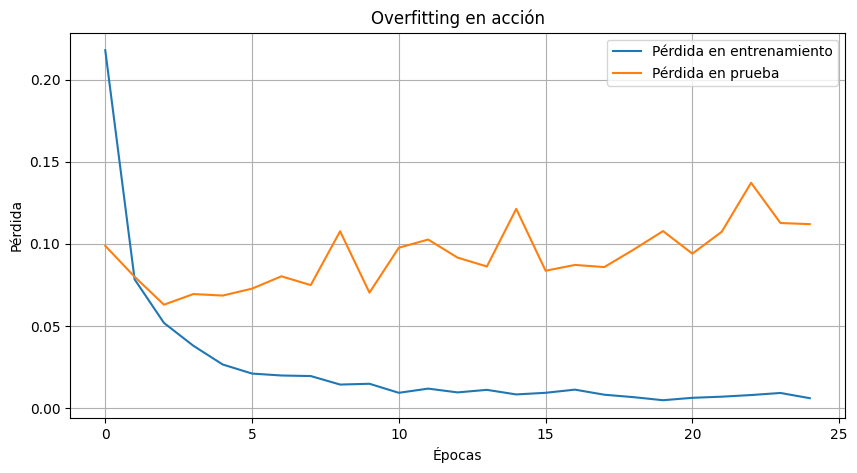

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.utils import to_categorical

# 1. Cargar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar (valores entre 0 y 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 2. Definir un modelo deliberadamente grande (propenso a overfitting)
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# 3. Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Entrenar por muchas épocas, sin validación ni regularización
history = model.fit(
    x_train, y_train,
    epochs=25,                     # muchas épocas para provocar overfitting
    batch_size=128,
    verbose=1,
    validation_data=(x_test, y_test)  # evaluaremos con test para mostrar overfitting
)

# 5. Graficar la pérdida de entrenamiento vs prueba
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en prueba')
plt.title('Overfitting en acción')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


# 🔄 Batch vs Epoch: ¿Cuál es la diferencia?

Cuando entrenamos una red neuronal, no le mostramos **todos los datos de una vez**, sino que los dividimos en partes más pequeñas. Aquí es donde entran los conceptos de **batch** y **epoch**.

---

## 🧁 ¿Qué es un Epoch?

Un **epoch** es una **vuelta completa** por todos los datos de entrenamiento. Es como si el modelo leyera **todo el dataset una vez**.

📌 Si tienes 1.000 imágenes y entrenas 5 epochs, el modelo verá cada imagen 5 veces en total.

---

## 🍬 ¿Qué es un Batch?

En lugar de entrenar con todo el dataset a la vez (lo cual puede ser muy costoso en memoria), dividimos los datos en **grupos más pequeños llamados batches**.

Por ejemplo:
- Dataset: 1.000 imágenes
- Batch size: 100
- Entonces: se hacen 10 pasos (batches) por epoch

📌 Cada batch se usa para actualizar los pesos del modelo.  
Cuanto más pequeño el batch, más actualizaciones (pero más ruidosas).

---

## 🧠 ¿Y qué es un Step?

Un **step** es una sola actualización del modelo.  
✅ 1 step = 1 batch procesado + 1 ajuste de pesos.

---

## 📊 Relación entre Epoch, Batch y Steps

```
        Epoch
    ┌──────────────┐
    │ 1 vuelta por │
    │ todo el set  │
    │ de datos     │
    └─────┬────────┘
          ▼
 Divide el set en Batches
  ┌─────┬─────┬─────┐
  │ B1  │ B2  │ B3  │ ...  (Batch size definido)
  └─────┴─────┴─────┘
    ▲     ▲     ▲
    │     │     │
 Step1 Step2 Step3 ... (cada uno actualiza los pesos)

 ```


---

## 🧠 Analogía para recordar

📘 **Dataset** = un libro completo  
📘 **Epoch** = leer el libro entero una vez  
📘 **Batch** = leer una página por turno  
📘 **Step** = después de cada página, haces un resumen y mejoras tu comprensión

---

## 📦 ¿Qué batch size se suele usar?

- Común: 32, 64 o 128
- Valores pequeños: aprendizaje más ruidoso pero rápido
- Valores grandes: aprendizaje más estable pero más costoso

---

## ✅ En resumen

| Concepto | Qué es                                  | Frecuencia                   |
|----------|------------------------------------------|------------------------------|
| Epoch    | Una pasada completa por todos los datos  | Se repite varias veces       |
| Batch    | Subconjunto de datos dentro del epoch    | Varios por cada epoch        |
| Step     | Una actualización del modelo (por batch) | Uno por cada batch procesado |


--------

# 🧠 Cómo evitar el Overfitting en redes neuronales

Cuando un modelo aprende **demasiado bien** los datos de entrenamiento, incluso el ruido o errores, pero **falla en datos nuevos**, decimos que tiene **overfitting**.

---

## 📉 ¿Cómo lo evitamos? Estrategias comunes

Aquí van algunas de las técnicas más usadas para evitar que el modelo se "memorice" los datos:

---

### 🔹 1. Usar **Dropout**

Durante el entrenamiento, **apaga aleatoriamente algunas neuronas** para que el modelo no dependa demasiado de ninguna.

🧠 Es como entrenar a un equipo haciendo que cada vez alguien distinto se quede en la banca: todos aprenden a participar.

Ejemplo en Keras:
```python
from keras.layers import Dropout

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # apaga el 30% de las neuronas
```

### 🔹 2. Usar EarlyStopping
Detiene el entrenamiento automáticamente cuando la validación ya no mejora. Así evitamos seguir entrenando cuando ya empezó el overfitting.

🧠 Es como estudiar hasta que ya no estás aprendiendo más: seguir solo te cansa.

Ejemplo en Keras:
```
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=3, restore_best_weights=True)
model.fit(x_train, y_train, validation_split=0.1, epochs=50, callbacks=[early_stop])

```

### 🔹 3. Reducir la complejidad del modelo
Modelos con muchas capas o muchas neuronas tienden a memorizar. A veces menos es más.

Reduce el número de capas ocultas o neuronas.

Usa funciones de activación más simples.


### 🔹 4. Usar más datos (o aumentarlos)
Cuantos más datos tenga el modelo para aprender, menos probable es que se memorice detalles irrelevantes.

🧠 Es como estudiar con muchos ejemplos diferentes: aprendes la idea, no solo el caso específico.

Ejemplo: en imágenes puedes usar data augmentation (rotar, escalar, voltear).

###🔹 5. Regularización L1 y L2
Penalizan los pesos grandes durante el entrenamiento, haciendo que el modelo sea más simple.

🧠 Es como poner una regla que diga: "no uses trucos complejos si puedes resolverlo fácil".

Ejemplo en Keras:

```
from keras.regularizers import l2

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
```

🎯 En resumen

| Técnica            | ¿Qué hace?                                     |
| ------------------ | ---------------------------------------------- |
| Dropout            | Apaga neuronas aleatoriamente                  |
| EarlyStopping      | Detiene entrenamiento cuando ya no mejora      |
| Reducción de capas | Hace el modelo más simple                      |
| Más datos          | Ayuda al modelo a generalizar mejor            |
| Regularización     | Penaliza pesos grandes para evitar complejidad |



Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7824 - loss: 1.0861 - val_accuracy: 0.9642 - val_loss: 0.3679
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9416 - loss: 0.4212 - val_accuracy: 0.9723 - val_loss: 0.2753
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9516 - loss: 0.3301 - val_accuracy: 0.9750 - val_loss: 0.2326
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9591 - loss: 0.2813 - val_accuracy: 0.9770 - val_loss: 0.2088
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9603 - loss: 0.2630 - val_accuracy: 0.9760 - val_loss: 0.2057
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9615 - loss: 0.2506 - val_accuracy: 0.9783 - val_loss: 0.1937
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9636 - loss: 0.2384 - val_accuracy: 0.9792 - val_loss: 0.1956
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9645 - loss: 0.2324 - val_accuracy:

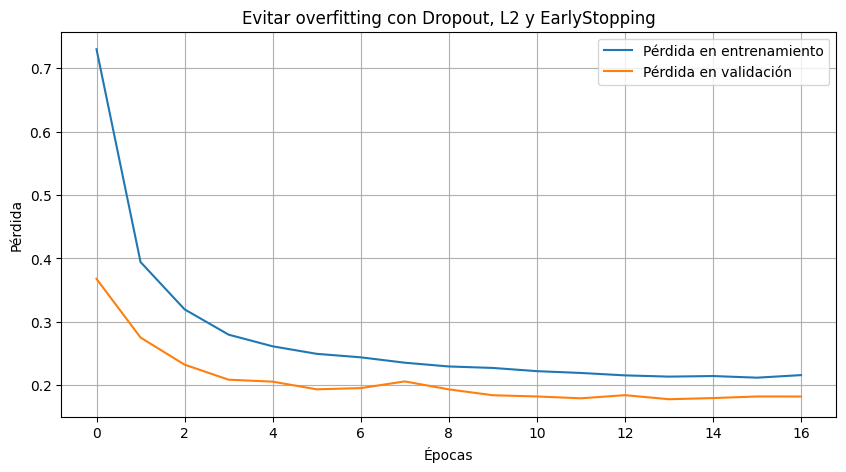

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

# 1. Cargar y preparar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 2. Definir el modelo con Dropout + L2
model = Sequential([
    Flatten(input_shape=(28, 28)),

    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),  # 30% de las neuronas apagadas aleatoriamente

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

# 3. Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Definir EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 5. Entrenar el modelo con validación y callbacks
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# 6. Evaluar el desempeño en datos de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f'\n✅ Precisión en datos de prueba: {accuracy:.4f}')

# 7. Visualizar pérdida para verificar que no hay overfitting
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Evitar overfitting con Dropout, L2 y EarlyStopping')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


# 🧠 ¿Cuántas neuronas usar por capa en una red neuronal?

Elegir el número de **neuronas por capa** es más un **arte con algo de ciencia**, porque no hay una fórmula exacta. Depende de la tarea, los datos y la complejidad del problema.

---

## 🎯 Objetivo: encontrar un equilibrio

- **Muy pocas neuronas** → el modelo no tiene suficiente capacidad (underfitting).
- **Demasiadas neuronas** → el modelo memoriza (overfitting), es lento y consume más memoria.

---

## 🧠 ¿Y cómo decidir cuántas poner?

Aquí van **5 principios prácticos** para decidir cuántas neuronas usar por capa:

---

### 🔹 1. Comienza con una capa oculta de tamaño intermedio

Una buena práctica es empezar con una cantidad **entre el tamaño de la entrada y la salida**.

📘 Ejemplo:
- Entrada = 784 (imagen 28x28)
- Salida = 10 clases
- 👉 Capa oculta: entre 64 y 256 neuronas

---

### 🔹 2. Usa potencias de 2 (opcional pero ordenado)

Números como 16, 32, 64, 128, 256 funcionan bien porque están optimizados para muchos sistemas.

---

### 🔹 3. Disminuye progresivamente

Si usas varias capas ocultas, lo normal es que las neuronas vayan **disminuyendo**:

```[ Entrada ] → 256 → 128 → 64 → [ Salida ]```


🧠 Como un embudo: la red va condensando la información.

---

### 🔹 4. Menos datos = menos neuronas

Si tienes un dataset pequeño, usa **menos neuronas** o puedes caer fácilmente en overfitting.

---

### 🔹 5. Prueba y evalúa (¡esto es normal!)

No hay un número mágico. Lo mejor es **probar varias configuraciones** (esto se llama tuning). Evalúa con validación (`val_loss`, `val_accuracy`) y ajusta.

---

## 📊 Tabla de referencia rápida

| Tipo de problema              | Neuronas sugeridas por capa     |
|------------------------------|----------------------------------|
| Imagen simple (MNIST)        | 64 a 256                         |
| Clasificación texto (embedding) | 128 a 512                    |
| Regresión simple             | 16 a 64                          |
| Datos tabulares              | 32 a 128                         |

---

## 🧠 Analogía para recordar

📘 Elegir neuronas es como diseñar una receta:  
- Si pones pocos ingredientes (neuronas), no tiene sabor (underfitting).  
- Si pones demasiados, queda saturado y pesado (overfitting).  
👉 Hay que probar y ajustar.

---

> 🎯 En resumen:
>
> - Empieza simple: 1 o 2 capas ocultas.
> - Usa entre 32 y 256 neuronas por capa.
> - Ajusta según los resultados en validación.
> - Si no sabes por dónde empezar: prueba 128 neuronas y ve hacia arriba o abajo.
